<h1>Project 20</h1>


<h2>Brazil Covid 19 Dataset</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary libraries***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in xlsx format***

In [2]:
df=pd.read_excel('covid19_clinical_dataset.xlsx')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Start of EDA process</h2>


***Checking shape of the Dataset***

In [3]:
df.shape

(5644, 111)

***Checking for Null values and datatype***


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [5]:
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

There are multiple columns where almost all the values are null, we are going to drop such columns completely

In [6]:
(df.isnull().sum()>4000).value_counts()

True     105
False      6
dtype: int64

In [7]:
df=df[['Patient ID','Patient age quantile','SARS-Cov-2 exam result','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)']]

In [8]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,negative,0,0,0
1,126e9dd13932f68,17,negative,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0
3,f7d619a94f97c45,5,negative,0,0,0
4,d9e41465789c2b5,15,negative,0,0,0


In [9]:
df.drop(['Patient ID'],axis=1,inplace=True)

In [10]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,negative,0,0,0
1,17,negative,0,0,0
2,8,negative,0,0,0
3,5,negative,0,0,0
4,15,negative,0,0,0


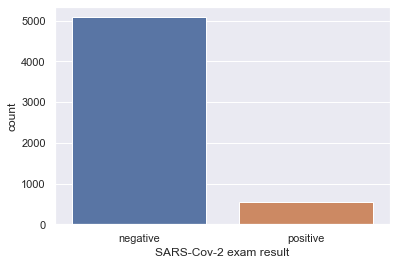

In [11]:
sns.countplot(df['SARS-Cov-2 exam result'])

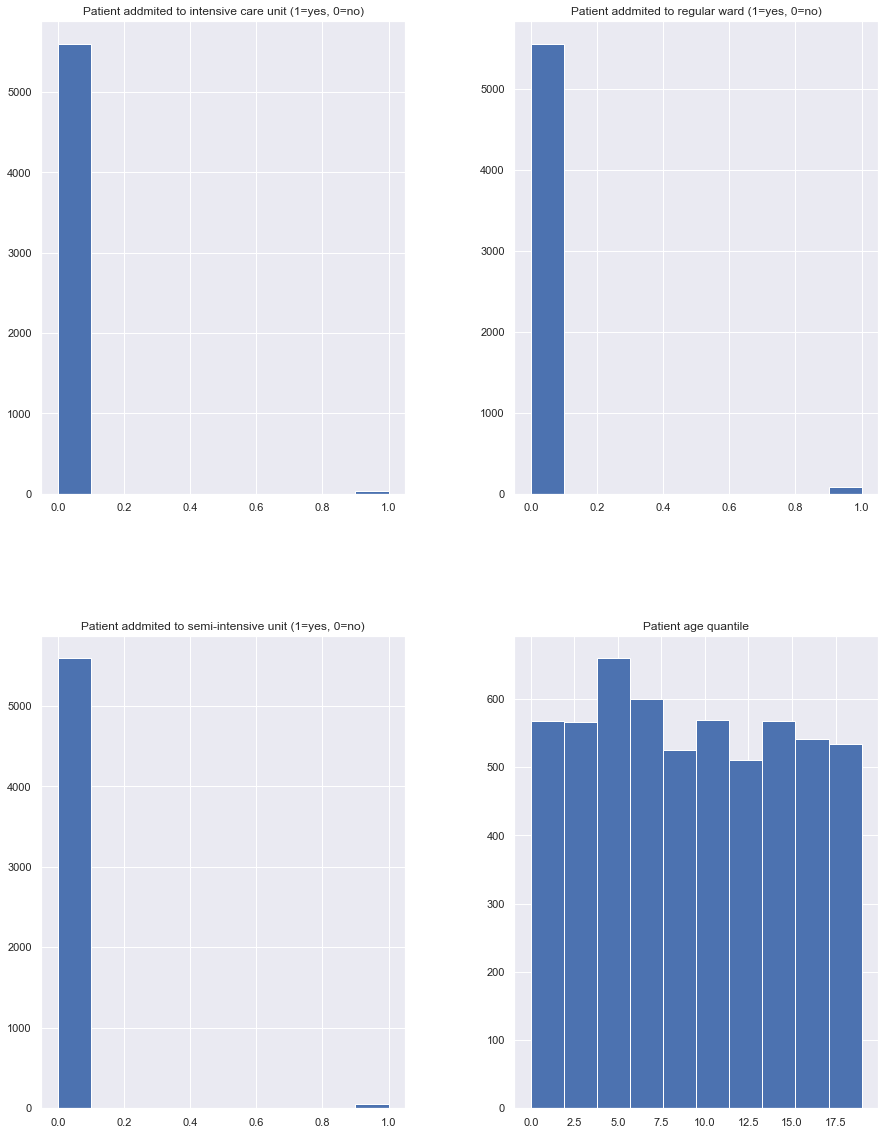

In [12]:
df.hist(figsize=(15,20))
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


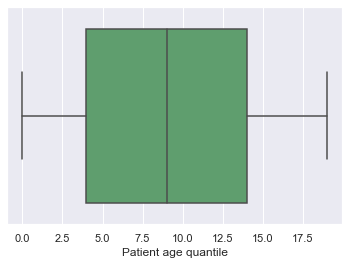

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


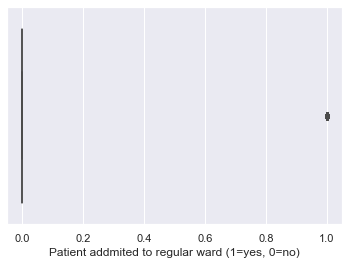

AxesSubplot(0.125,0.125;0.775x0.755)


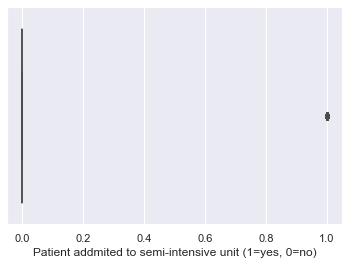

AxesSubplot(0.125,0.125;0.775x0.755)


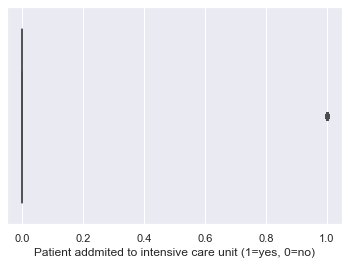

In [13]:
for i in df.columns:
    if df[i].dtype=="object":
        print(df[i].value_counts())
        
    else:
        print(sns.boxplot(df[i],color='g'))
        plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

In [15]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,0,0,0,0
1,17,0,0,0,0
2,8,0,0,0,0
3,5,0,0,0,0
4,15,0,0,0,0


In [16]:
df.isnull().sum()

Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


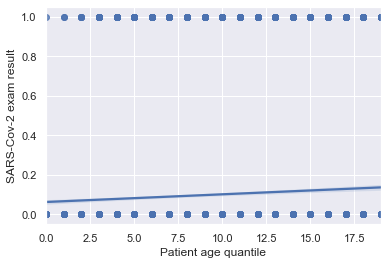

AxesSubplot(0.125,0.125;0.775x0.755)


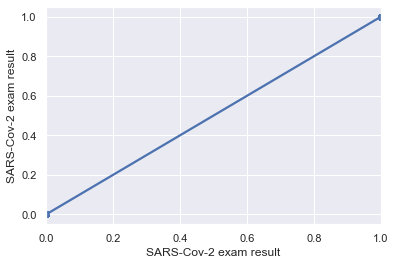

AxesSubplot(0.125,0.125;0.775x0.755)


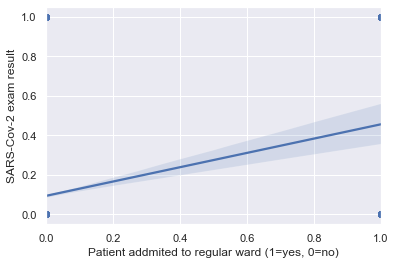

AxesSubplot(0.125,0.125;0.775x0.755)


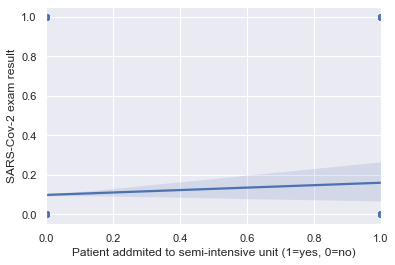

AxesSubplot(0.125,0.125;0.775x0.755)


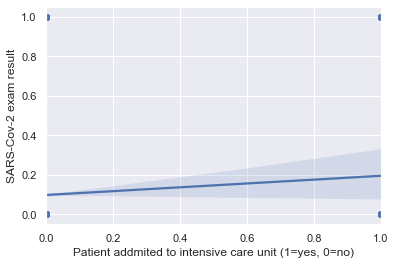

In [17]:
for i in df.columns:
    print(sns.regplot(x=df[i],y="SARS-Cov-2 exam result",data=df))
    plt.show()

***Lets calculate correlation to make this more clear***

In [18]:
df.corr()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
Patient age quantile,1.000000,0.075244,0.046166,0.015736,-0.035772
SARS-Cov-2 exam result,0.075244,1.000000,0.142437,0.019364,0.027586
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,0.142437,1.000000,-0.011264,-0.010192
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,0.019364,-0.011264,1.000000,-0.008087
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,0.027586,-0.010192,-0.008087,1.000000


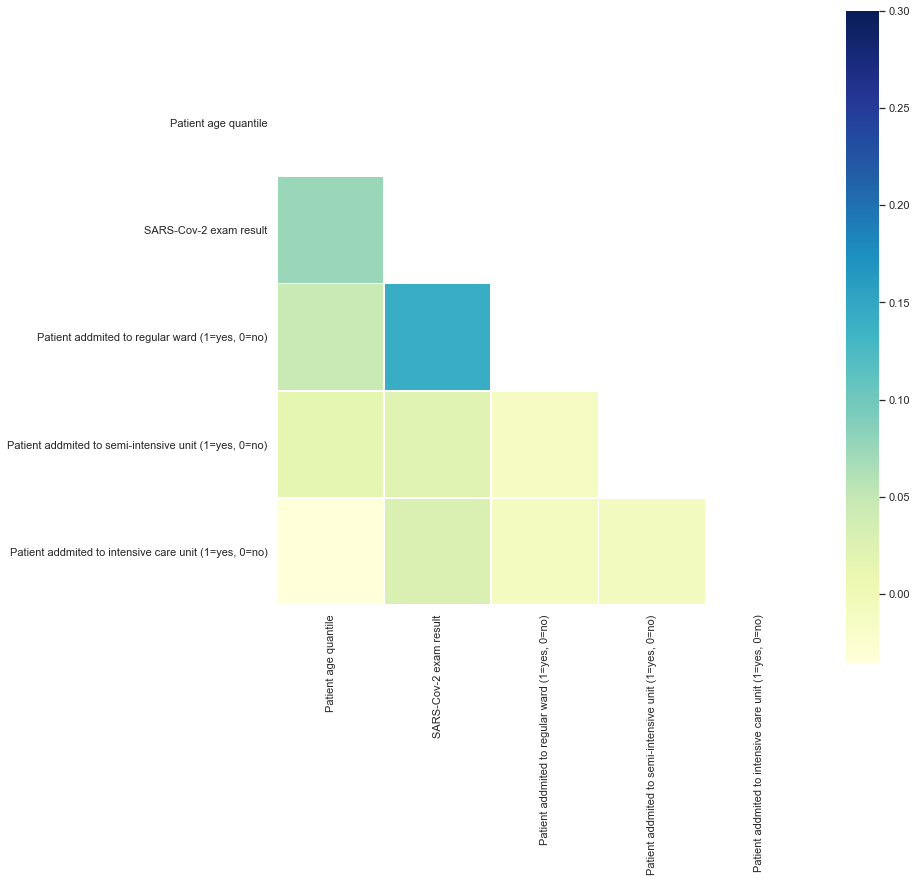

In [19]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5,cmap="YlGnBu")

In [20]:
y=df[['SARS-Cov-2 exam result']]
y.head()

,SARS-Cov-2 exam result
0,0
1,0
2,0
3,0
4,0


In [21]:
x=df.drop(['SARS-Cov-2 exam result'],axis=1)
x.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,0,0,0
1,17,0,0,0
2,8,0,0,0
3,5,0,0,0
4,15,0,0,0


**Note**: Outliers and skew test was not done as most of the attributes were converted from category

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

Since out target variable is Bivariant, we are going to do classification analysis

***Lets import required packages***

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

***Lets split our data randomly and see which model works better***

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Lets import all the regression models***

In [24]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [25]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

***Lets create a loop that will execute all our models***


*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.9043401240035429


Cross_Val_Score =  0.8970570514027492


roc_auc_score =  0.5041399136648892


classification_report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.50      0.01      0.02       108

    accuracy                           0.90      1129
   macro avg       0.70      0.50      0.48      1129
weighted avg       0.87      0.90      0.86      1129



[[1020    1]
 [ 107    1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


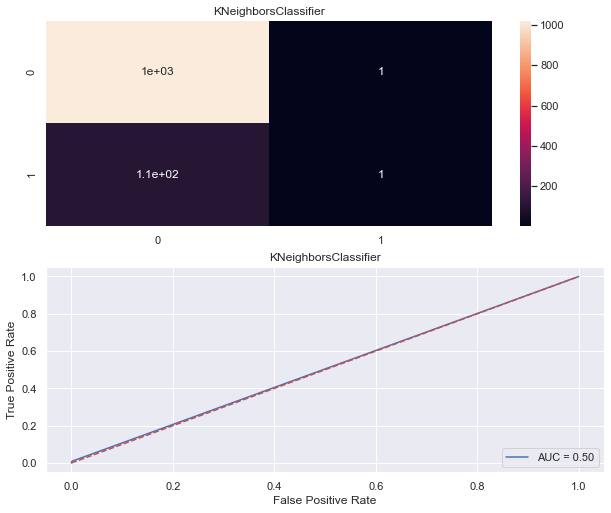




*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  0.9043401240035429


Cross_Val_Score =  0.9011341241448566


roc_auc_score =  0.5


classification_report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1021
           1       0.00      0.00      0.00       108

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.82      0.90      0.86      1129



[[1021    0]
 [ 108    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


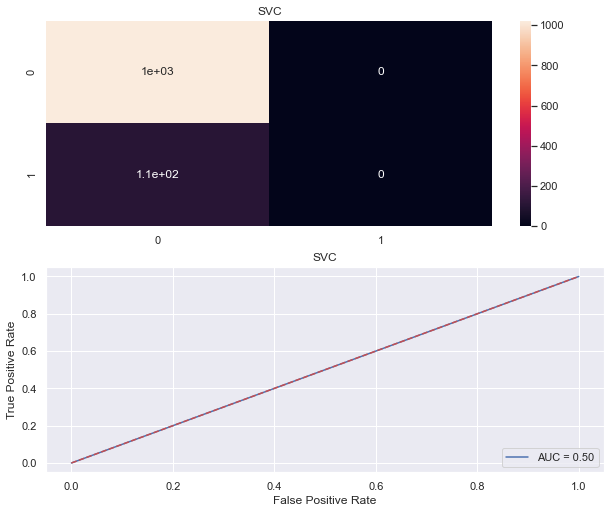




*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  0.9043401240035429


Cross_Val_Score =  0.9002482269503546


roc_auc_score =  0.5124197409946675


classification_report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.50      0.03      0.05       108

    accuracy                           0.90      1129
   macro avg       0.70      0.51      0.50      1129
weighted avg       0.87      0.90      0.86      1129



[[1018    3]
 [ 105    3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


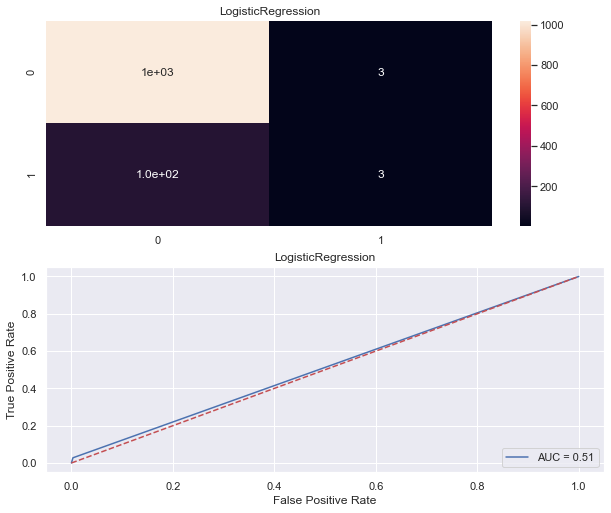




*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.9025686448184234


Cross_Val_Score =  0.899538693278102


roc_auc_score =  0.5114403090651866


classification_report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.38      0.03      0.05       108

    accuracy                           0.90      1129
   macro avg       0.64      0.51      0.50      1129
weighted avg       0.86      0.90      0.86      1129



[[1016    5]
 [ 105    3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


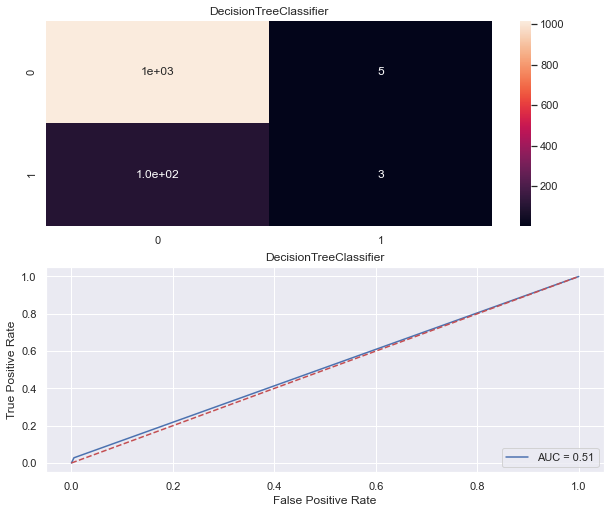




*-----------------------------* GaussianNB *------------------------------*


GaussianNB()


Accuracy_score =  0.895482728077945


Cross_Val_Score =  0.888905416431306


roc_auc_score =  0.5323620633365981


classification_report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1021
           1       0.32      0.08      0.13       108

    accuracy                           0.90      1129
   macro avg       0.62      0.53      0.54      1129
weighted avg       0.85      0.90      0.87      1129



[[1002   19]
 [  99    9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


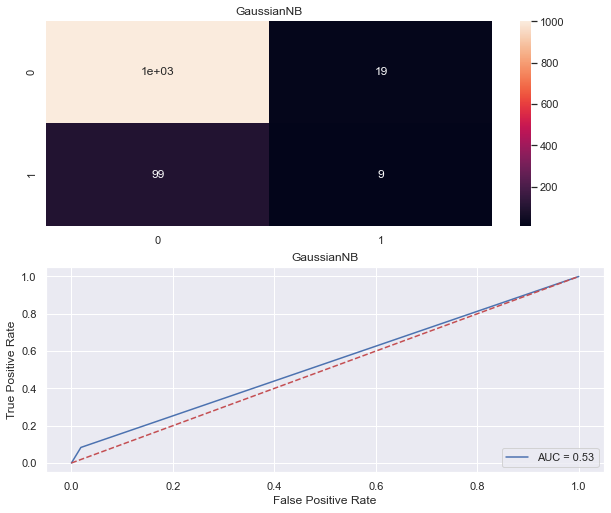

In [26]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [27]:
Final_R = pd.DataFrame({'Classification Model': Model, 'Accuracy Score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
Final_R

,Classification Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,90.434012,89.705705,50.413991
1,SVC,90.434012,90.113412,50.000000
2,LogisticRegression,90.434012,90.024823,51.241974
3,DecisionTreeClassifier,90.256864,89.953869,51.144031
4,GaussianNB,89.548273,88.890542,53.236206


Logistic Regression seems to be working better with better Cross_val_score and Roc_auc_curve, so lets try to make this better and see if we can increase its accuracy more

***Lets first find best random state for Logistic Regression to split our data into train and test data***

In [28]:
max_accuracy=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        final_r_state=r_state
print("Maximum Accuracy is achived for random state ",final_r_state," with a score of",max_accuracy)

Maximum Accuracy is achived for random state  70  with a score of 0.9264836138175376


***Lets split our dataset based on above random state***

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)

***Lets find best hyperparameters for Logistic Regression using grid search***

In [30]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lr=LogisticRegression()
lr_cv=GridSearchCV(lr,grid,cv=10)
lr_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.8967898279143693


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1044
           1       0.00      0.00      0.00        85

    accuracy                           0.92      1129
   macro avg       0.46      0.50      0.48      1129
weighted avg       0.86      0.92      0.89      1129



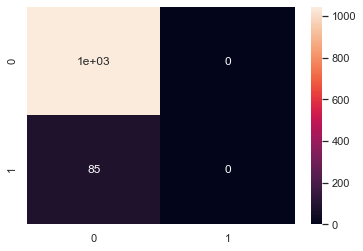

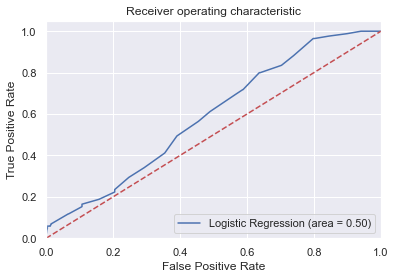

Accuracy of the model is 92.47121346324181


In [31]:
lr_f=LogisticRegression(penalty='l2',C=0.1)
lr_f.fit(x_train,y_train)
pre=lr_f.predict(x_test)
accuracy=accuracy_score(y_test,pre)
cm=sns.heatmap(confusion_matrix(y_test,pre),annot=True)
print(classification_report(y_test, pre))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test, pre)
fpr, tpr, thresholds = roc_curve(y_test, lr_f.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('Accuracy of the model is',accuracy*100)

We have achived accuracy of 92.47%

<h2>End of Machine learning Process</h2>

<h1>Now lets save our final model</h1>

In [32]:
import joblib
joblib.dump(lr_f,'Brazil_Covid_19.pkl')

['Brazil_Covid_19.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">